In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [ ]:
# Load the dataset
file_path = '/content/Hotel Reservations.csv'
hotel_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
hotel_data.head()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
hotel_data.shape

(36275, 19)

In [ ]:
hotel_data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [ ]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Let's start with the first step, Data Cleaning and Preprocessing.

In [ ]:
# Checking for missing values in each column
missing_values = hotel_data.isnull().sum()

# Checking for anomalies in the dataset such as negative values or illogical entries
anomalies = {
    'negative_values': hotel_data.select_dtypes(include=['int', 'float']).lt(0).sum(),
    'illogical_entries': {
        'no_of_adults': (hotel_data['no_of_adults'] <= 0).sum(),
        'no_of_children': (hotel_data['no_of_children'] < 0).sum(),
        'no_of_weekend_nights': (hotel_data['no_of_weekend_nights'] < 0).sum(),
        'no_of_week_nights': (hotel_data['no_of_week_nights'] < 0).sum(),
        'lead_time': (hotel_data['lead_time'] < 0).sum(),
        'avg_price_per_room': (hotel_data['avg_price_per_room'] <= 0).sum()
    }
}

missing_values, anomalies



(Booking_ID                              0
 no_of_adults                            0
 no_of_children                          0
 no_of_weekend_nights                    0
 no_of_week_nights                       0
 type_of_meal_plan                       0
 required_car_parking_space              0
 room_type_reserved                      0
 lead_time                               0
 arrival_year                            0
 arrival_month                           0
 arrival_date                            0
 market_segment_type                     0
 repeated_guest                          0
 no_of_previous_cancellations            0
 no_of_previous_bookings_not_canceled    0
 avg_price_per_room                      0
 no_of_special_requests                  0
 booking_status                          0
 dtype: int64,
 {'negative_values': no_of_adults                            0
  no_of_children                          0
  no_of_weekend_nights                    0
  no_of_week_nigh

**Illogical Entries:**

no_of_adults: There are 139 entries where the number of adults is 0 or less, which is illogical for a hotel booking.
avg_price_per_room: 545 entries have a value of 0 or less for the average price per room, which is not practical.

In [ ]:
# Calculating the proportion of illogical entries in the dataset
total_entries = len(hotel_data)
proportion_no_of_adults = round((anomalies['illogical_entries']['no_of_adults'] / total_entries) * 100,2)
proportion_avg_price_per_room = round((anomalies['illogical_entries']['avg_price_per_room'] / total_entries) * 100,2)

proportion_no_of_adults, proportion_avg_price_per_room



(0.38, 1.5)

The proportion of illogical entries in the dataset is relatively low:

No of Adults: Only about 0.38% of entries have an illogical number of adults (zero or less).
Average Price per Room: Approximately 1.50% of entries have an illogical average price per room (zero or less).
Given these low percentages, the most straightforward approach would be to remove these illogical entries. This decision is based on the assumption that removing such a small proportion of the data will not significantly impact the overall analysis and model performance.

Let's proceed to remove these entries

In [ ]:
# Removing illogical entries
hotel_data_cleaned = hotel_data[(hotel_data['no_of_adults'] > 0) & (hotel_data['avg_price_per_room'] > 0)]

# Verifying the removal
remaining_illogical_entries = {
    'no_of_adults': (hotel_data_cleaned['no_of_adults'] <= 0).sum(),
    'avg_price_per_room': (hotel_data_cleaned['avg_price_per_room'] <= 0).sum()
}

# Display the shape of the cleaned data
cleaned_data_shape = hotel_data_cleaned.shape

remaining_illogical_entries, cleaned_data_shape



({'no_of_adults': 0, 'avg_price_per_room': 0}, (35595, 19))

Next, we will conduct Exploratory Data Analysis (EDA). This involves:

Generating statistical summaries of the data.<br>
Creating visualizations to understand the distribution and relationships of various features.<br>
Exploring booking trends and patterns.<br>

Let's begin by generating some basic statistical summaries and visualizations.<br>

In [ ]:

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Basic statistical summary of the numerical features
numerical_summary = hotel_data_cleaned.describe()


numerical_summary



,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,35595.000000,35595.000000,35595.000000,35595.000000,35595.000000,35595.000000,35595.000000,35595.000000,35595.000000,35595.000000,35595.000000,35595.000000,35595.000000,35595.000000
mean,1.857986,0.098160,0.818261,2.219722,0.030791,86.129288,2017.823767,7.415648,15.602837,0.022559,0.021492,0.129260,105.080842,0.616294
std,0.504270,0.385551,0.871778,1.410240,0.172753,85.992392,0.381023,3.063356,8.746729,0.148496,0.363401,1.645034,32.904204,0.782660
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.500000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,18.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,81.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,58.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,100.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,128.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,121.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


**Numerical Summary:**

The average number of adults per booking is about 1.86, with a maximum of 4 adults.
The number of children per booking averages around 0.1, indicating that most bookings do not include children.
The average number of weekend nights is approximately 0.82, and weeknights are around 2.22.
The lead time (number of days between the booking and the arrival date) averages 86 days.
The average price per room is about €105.08.

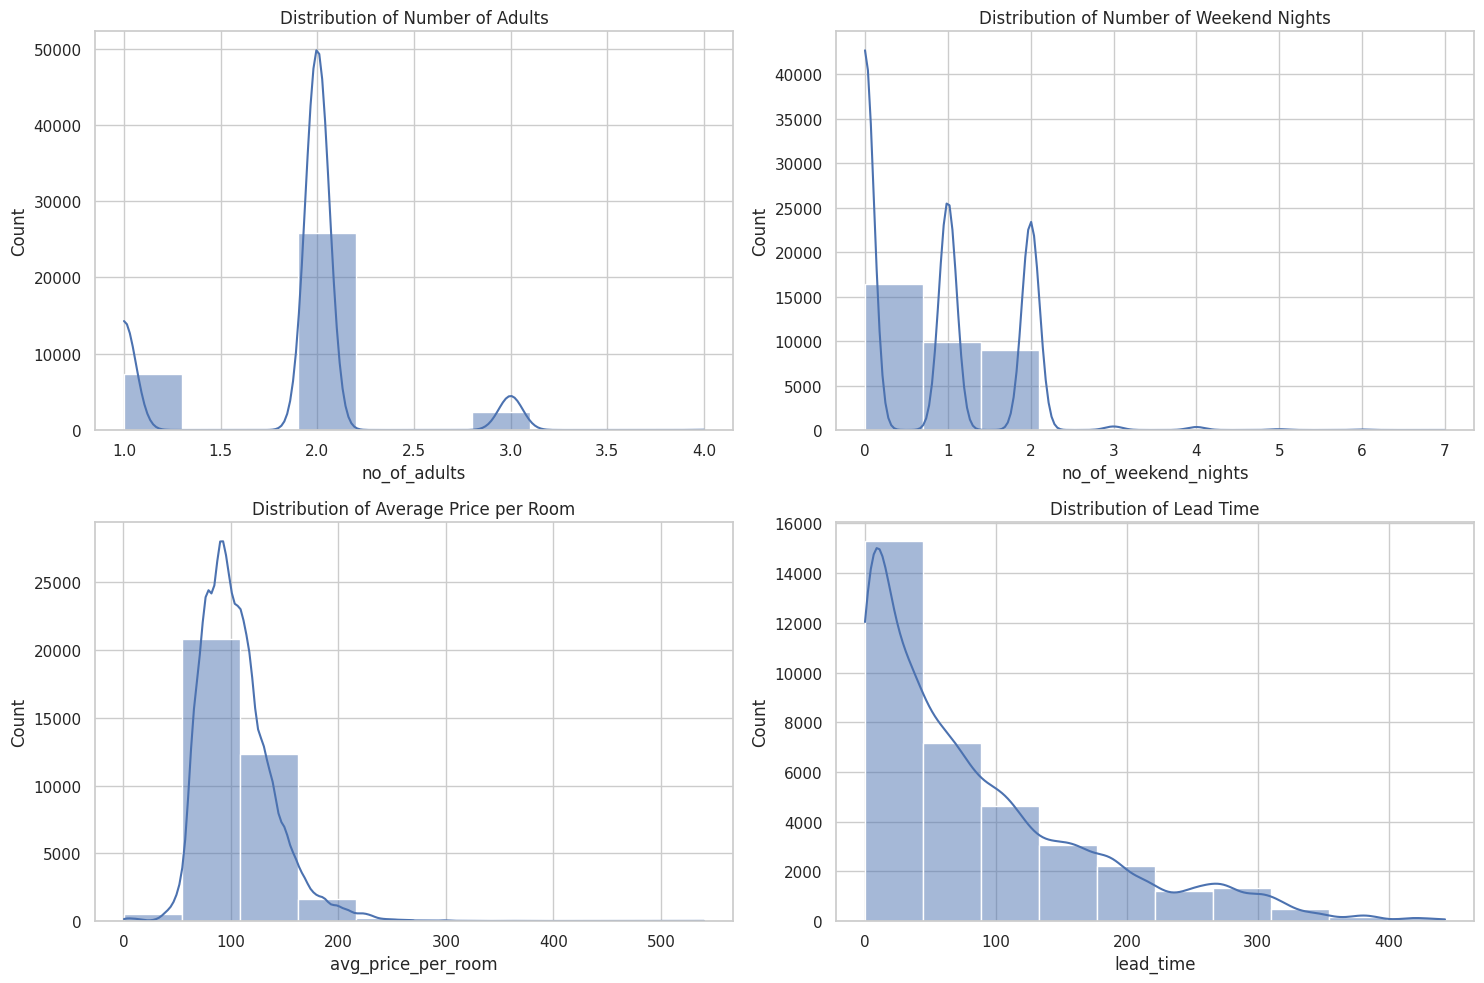

In [ ]:

# Plotting histograms for some key numerical features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sns.histplot(hotel_data_cleaned['no_of_adults'], bins=10, kde=True, ax=axes[0,0])
axes[0,0].set_title('Distribution of Number of Adults')

sns.histplot(hotel_data_cleaned['no_of_weekend_nights'], bins=10, kde=True, ax=axes[0,1])
axes[0,1].set_title('Distribution of Number of Weekend Nights')

sns.histplot(hotel_data_cleaned['avg_price_per_room'], bins=10, kde=True, ax=axes[1,0])
axes[1,0].set_title('Distribution of Average Price per Room')

sns.histplot(hotel_data_cleaned['lead_time'], bins=10, kde=True, ax=axes[1,1])
axes[1,1].set_title('Distribution of Lead Time')

plt.tight_layout()

**Visualizations:**

The distribution of the number of adults is skewed towards bookings for two adults.
The number of weekend nights stayed is generally low, with most bookings including 0 to 2 weekend nights.
The average price per room has a wide range but is mostly concentrated between €50 and €150.
The lead time for bookings shows a broad distribution, with many bookings made relatively close to the arrival date and some made well in advance.

# **Extensive EDA**

**What is the distribution of the number of adults per booking?**

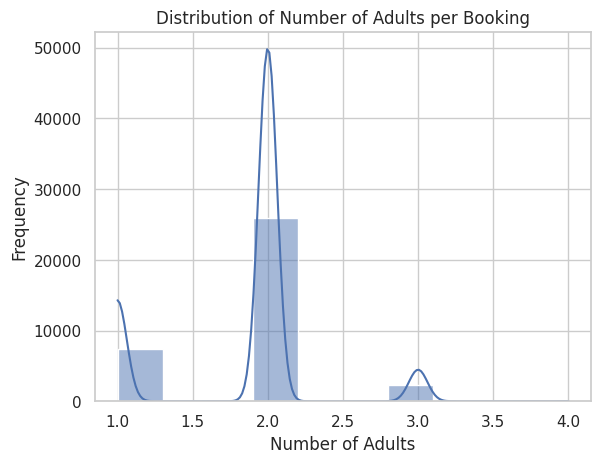

In [ ]:
sns.histplot(hotel_data_cleaned['no_of_adults'], bins=10, kde=True)
plt.title('Distribution of Number of Adults per Booking')
plt.xlabel('Number of Adults')
plt.ylabel('Frequency')
plt.show()


**How does the number of children vary across bookings?**

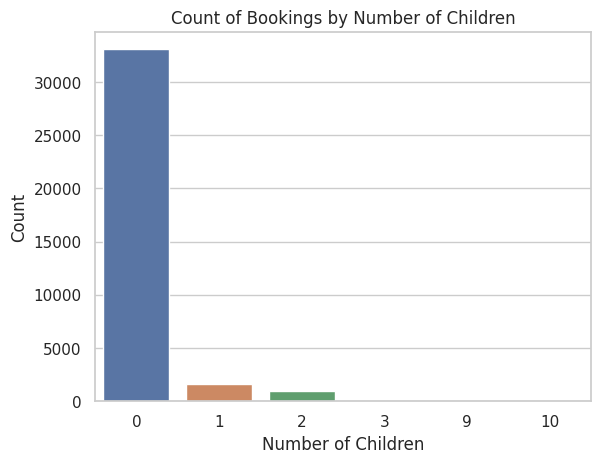

In [ ]:
sns.countplot(x='no_of_children', data=hotel_data_cleaned)
plt.title('Count of Bookings by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()


**What is the average number of weekend nights stayed in bookings?**

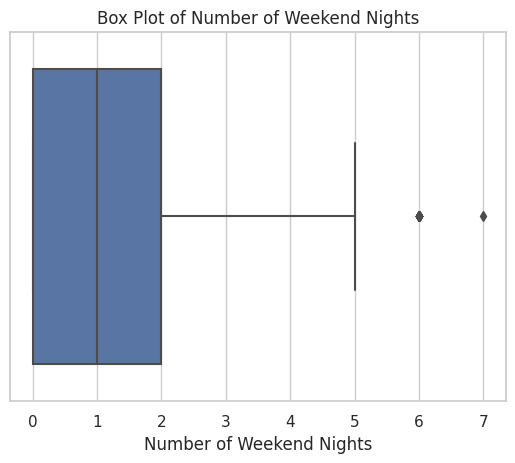

In [ ]:
sns.boxplot(x=hotel_data_cleaned['no_of_weekend_nights'])
plt.title('Box Plot of Number of Weekend Nights')
plt.xlabel('Number of Weekend Nights')
plt.show()


**Distribution of weeknights in hotel bookings.**

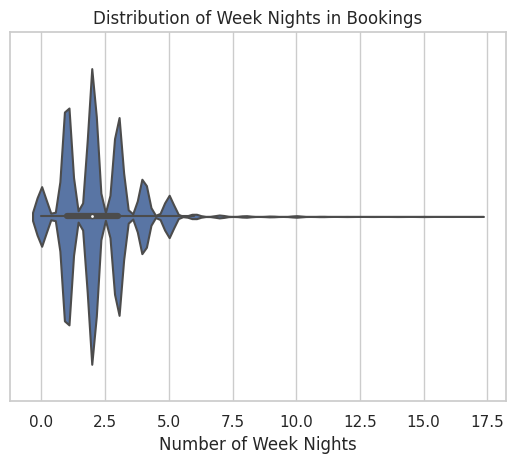

In [ ]:
sns.violinplot(x='no_of_week_nights', data=hotel_data_cleaned)
plt.title('Distribution of Week Nights in Bookings')
plt.xlabel('Number of Week Nights')
plt.show()


**How does the required car parking space vary among bookings?**

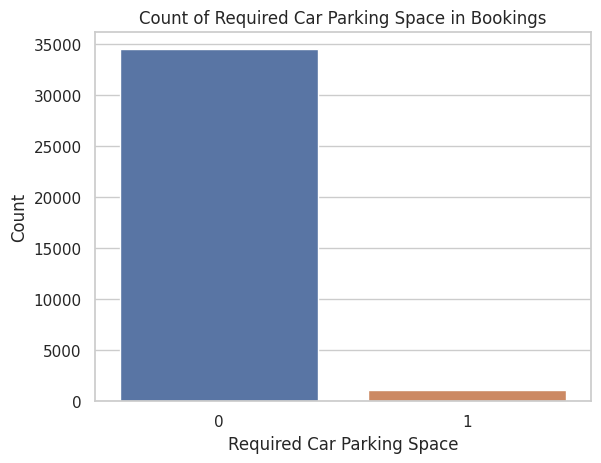

In [ ]:
sns.countplot(x='required_car_parking_space', data=hotel_data_cleaned)
plt.title('Count of Required Car Parking Space in Bookings')
plt.xlabel('Required Car Parking Space')
plt.ylabel('Count')
plt.show()


**What are the popular types of meal plans chosen?**

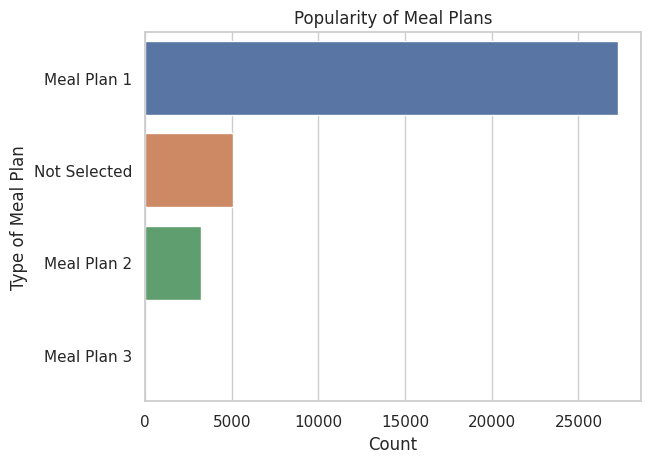

In [ ]:
sns.countplot(y='type_of_meal_plan', data=hotel_data_cleaned)
plt.title('Popularity of Meal Plans')
plt.xlabel('Count')
plt.ylabel('Type of Meal Plan')
plt.show()


**Distribution of room types reserved.**

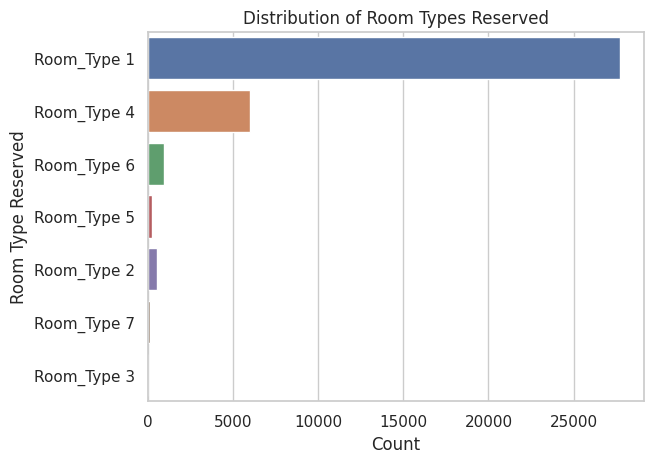

In [ ]:
sns.countplot(y='room_type_reserved', data=hotel_data_cleaned)
plt.title('Distribution of Room Types Reserved')
plt.xlabel('Count')
plt.ylabel('Room Type Reserved')
plt.show()


**Lead time distribution for bookings.**

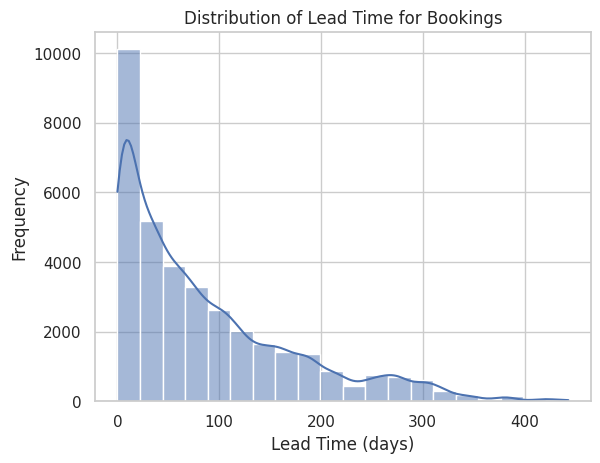

In [ ]:
sns.histplot(hotel_data_cleaned['lead_time'], bins=20, kde=True)
plt.title('Distribution of Lead Time for Bookings')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()


**Trends in booking across different years.**

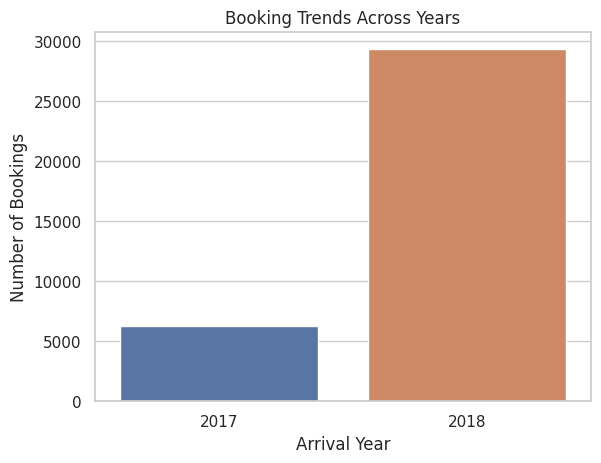

In [ ]:
sns.countplot(x='arrival_year', data=hotel_data_cleaned)
plt.title('Booking Trends Across Years')
plt.xlabel('Arrival Year')
plt.ylabel('Number of Bookings')
plt.show()


**Monthly booking trends.**

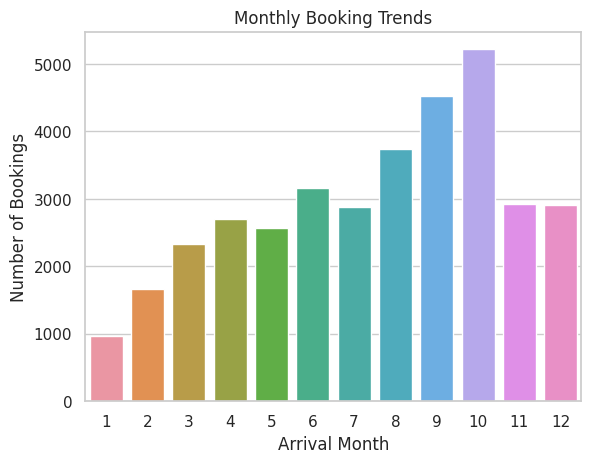

In [ ]:
sns.countplot(x='arrival_month', data=hotel_data_cleaned)
plt.title('Monthly Booking Trends')
plt.xlabel('Arrival Month')
plt.ylabel('Number of Bookings')
plt.show()


**Day of the month with most bookings.**

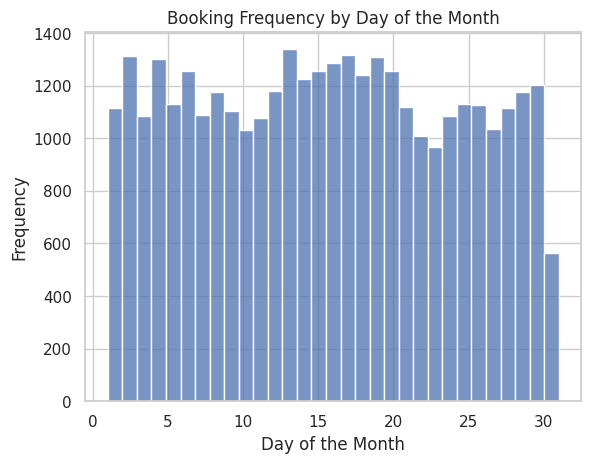

In [ ]:
sns.histplot(hotel_data_cleaned['arrival_date'], bins=31, kde=False)
plt.title('Booking Frequency by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Frequency')
plt.show()


**Market segment type distribution in bookings.**

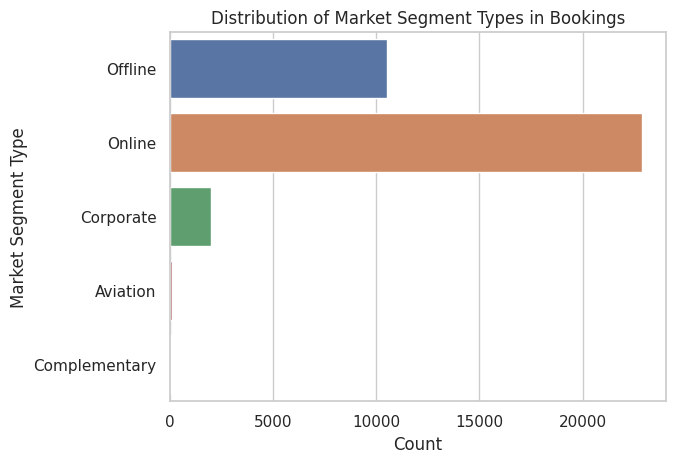

In [ ]:
sns.countplot(y='market_segment_type', data=hotel_data_cleaned)
plt.title('Distribution of Market Segment Types in Bookings')
plt.xlabel('Count')
plt.ylabel('Market Segment Type')
plt.show()


**Proportion of repeated guests.**

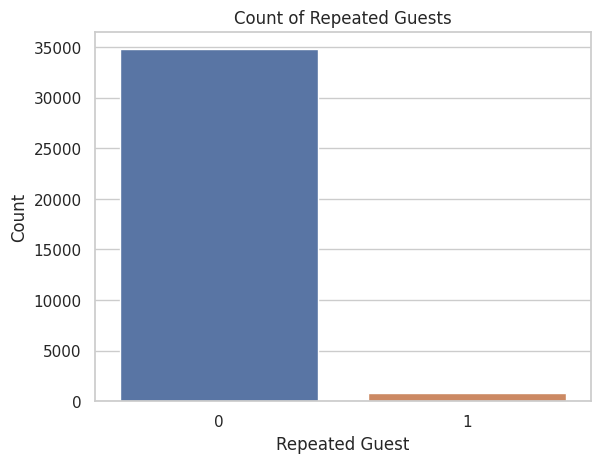

In [ ]:
sns.countplot(x='repeated_guest', data=hotel_data_cleaned)
plt.title('Count of Repeated Guests')
plt.xlabel('Repeated Guest')
plt.ylabel('Count')
plt.show()


**Analysis of previous cancellations.**

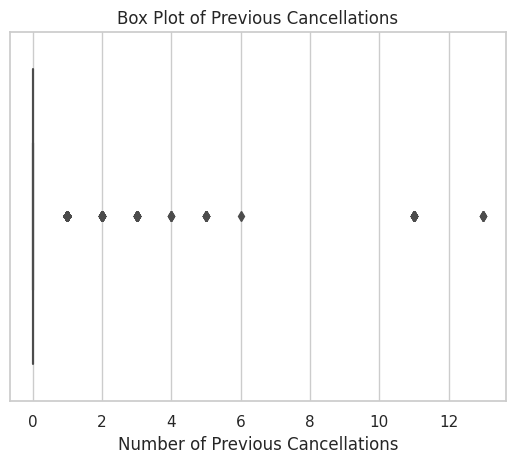

In [ ]:
sns.boxplot(x=hotel_data_cleaned['no_of_previous_cancellations'])
plt.title('Box Plot of Previous Cancellations')
plt.xlabel('Number of Previous Cancellations')
plt.show()


**Booking patterns based on the number of special requests.**

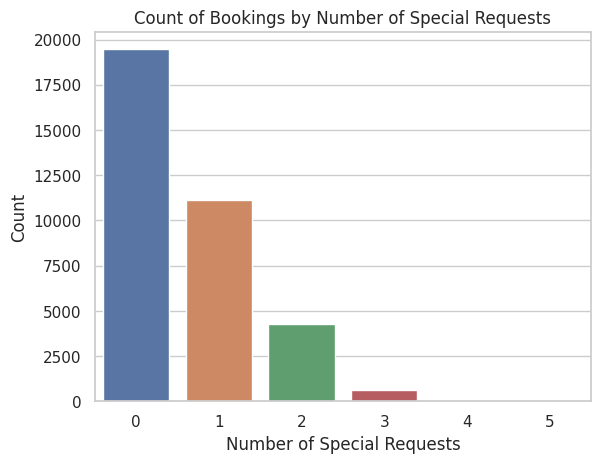

In [ ]:
sns.countplot(x='no_of_special_requests', data=hotel_data_cleaned)
plt.title('Count of Bookings by Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Count')
plt.show()


**Average price per room distribution.**

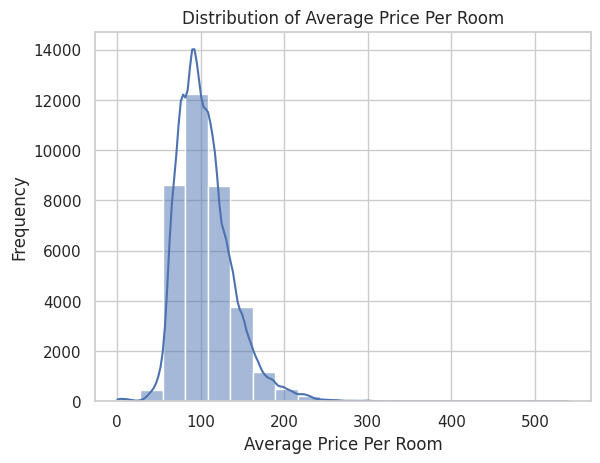

In [ ]:
sns.histplot(hotel_data_cleaned['avg_price_per_room'], bins=20, kde=True)
plt.title('Distribution of Average Price Per Room')
plt.xlabel('Average Price Per Room')
plt.ylabel('Frequency')
plt.show()


**Correlation heatmap of numerical variables.**

<ipython-input-97-a0f53ce29f15>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = hotel_data_cleaned.corr()


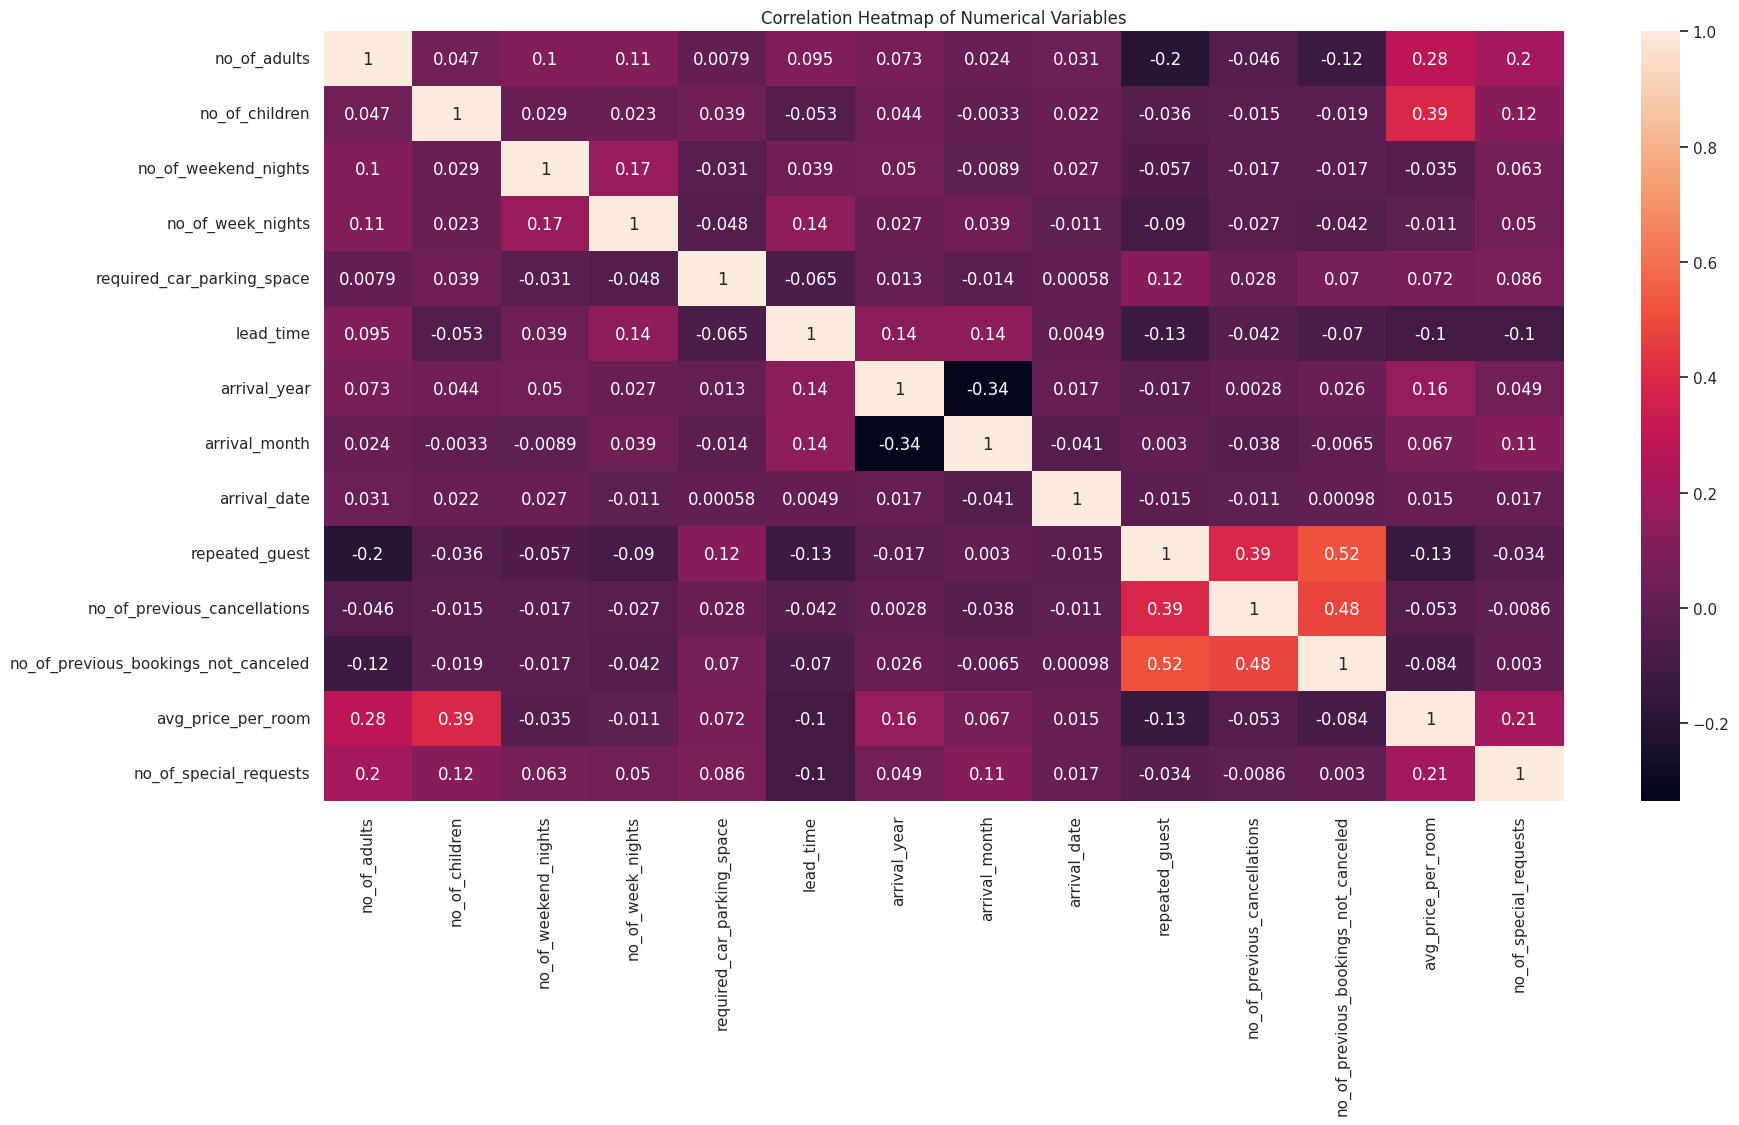

In [ ]:
plt.figure(figsize=(20, 10))
correlation_matrix = hotel_data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


**Comparison of booking status (canceled vs not canceled)**

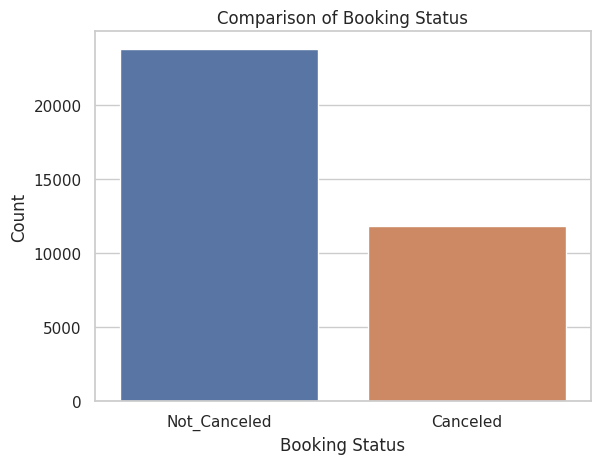

In [ ]:
sns.countplot(x='booking_status', data=hotel_data_cleaned)
plt.title('Comparison of Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.show()


**Lead time impact on booking cancellation.**

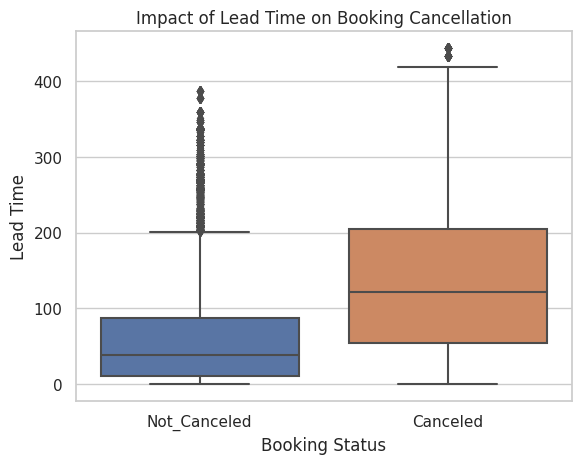

In [ ]:
sns.boxplot(x='booking_status', y='lead_time', data=hotel_data_cleaned)
plt.title('Impact of Lead Time on Booking Cancellation')
plt.xlabel('Booking Status')
plt.ylabel('Lead Time')
plt.show()


**Relationship between special requests and booking status.**

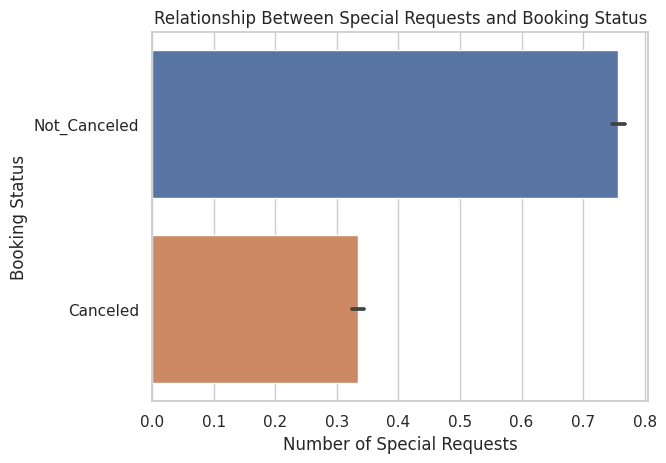

In [ ]:
sns.barplot(x='no_of_special_requests', y='booking_status', data=hotel_data_cleaned)
plt.title('Relationship Between Special Requests and Booking Status')
plt.xlabel('Number of Special Requests')
plt.ylabel('Booking Status')
plt.show()

# **EDA Insights**

- **Adult Bookings**: The majority of bookings typically include 2 adults.
- **Children in Bookings**: Bookings often do not include children, indicating a trend towards adult-only stays.
- **Weekend Nights**: On average, stays include 1 weekend night, though there are instances of stays extending up to 6 or 7 weekend nights.
- **Week Nights**: The average number of weeknights per booking ranges from 2 to 3, with some bookings extending up to a maximum of 17 nights.
- **Car Parking Preference**: Most customers do not opt for car parking spaces with their booking.
- **Meal Plan Preference**: Meal Plan 1 emerges as the most popular meal choice among customers.
- **Room Type Preference**: Room Type 1 is the most frequently chosen room type.
- **Lead Time for Bookings**: Many bookings are made with no significant lead time, although some bookings are made more than 200 days in advance.
- **Booking Year Trends**: The majority of the data comprises bookings from the year 2018.
- **Monthly Booking Trends**: Bookings peak during months 9 and 10, with fewer bookings in months 1 and 2.
- **Booking Method**: Online booking is predominant, with very few bookings coming from the Corporate Market Segment.
- **Repeated Guests**: The dataset indicates an absence of repeated customers, highlighting a notable aspect of customer behavior.
- **Special Requests in Bookings**: Special requests are generally not common in bookings, though some include 1 or 2 special requests.
- **Room Pricing**: The average room price is around 100 Euros.
- **Relation of Previous Bookings with Repeated Guests**: The number of previous bookings not canceled shows a relationship with the presence of repeated guests.
- **Room Pricing and Children**: The average price per room shows a correlation with the number of children in the booking.
- **Lead Time and Cancellations**: There is a noticeable relationship between the lead time of a booking and its likelihood of being canceled.

**Train Test Split**

In [ ]:

# Selecting relevant features and the target variable
features = hotel_data_cleaned.drop('booking_status', axis=1)
target = hotel_data_cleaned['booking_status']

# Encoding categorical variables
label_encoder = LabelEncoder()
categorical_columns = features.select_dtypes(include=['object']).columns
features_encoded = features.copy()
for column in categorical_columns:
    features_encoded[column] = label_encoder.fit_transform(features[column])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

X_train.shape, X_test.shape



((28476, 18), (7119, 18))

# **Applying Models**

**KNN**

In [ ]:
# Training the K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predicting on the test set
y_pred_knn = knn.predict(X_test)

# Evaluating the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)

accuracy_knn



0.7072622559348223

In [ ]:
print(classification_report_knn)

              precision    recall  f1-score   support

    Canceled       0.58      0.45      0.51      2398
Not_Canceled       0.75      0.84      0.79      4721

    accuracy                           0.71      7119
   macro avg       0.67      0.64      0.65      7119
weighted avg       0.69      0.71      0.70      7119



**Accuracy:**
The model achieved an accuracy of approximately 70.7% on the test set.

**Classification Report:**
Precision: For 'Canceled' bookings, the precision is 0.58, and for 'Not_Canceled' bookings, it is 0.75.
Recall: The recall is 0.45 for 'Canceled' and 0.84 for 'Not_Canceled' bookings.
F1-Score: The F1-scores are 0.51 for 'Canceled' and 0.79 for 'Not_Canceled' bookings.

The kNN model performs better at identifying 'Not_Canceled' bookings compared to 'Canceled' bookings, as evidenced by higher metrics in precision, recall, and f1-score for the 'Not_Canceled' class. However, there is room for improvement, especially in accurately predicting cancellations (as indicated by the lower recall for the 'Canceled' class).

**DecisionTree**

In [ ]:
# Training the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predicting on the test set
y_pred_dt = decision_tree.predict(X_test)

# Evaluating the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_report_dt = classification_report(y_test, y_pred_dt)

accuracy_dt



0.8560191038067144

In [ ]:
print(classification_report_dt)

              precision    recall  f1-score   support

    Canceled       0.78      0.80      0.79      2398
Not_Canceled       0.90      0.89      0.89      4721

    accuracy                           0.86      7119
   macro avg       0.84      0.84      0.84      7119
weighted avg       0.86      0.86      0.86      7119



**Accuracy:**
The model achieved an accuracy of approximately 85.60% on the test set.

**Classification Report:**
Precision: For 'Canceled' bookings, the precision is 0.78, and for 'Not_Canceled' bookings, it is 0.90.
Recall: The recall is 0.80 for 'Canceled' and 0.89 for 'Not_Canceled' bookings.
F1-Score: The F1-scores are 0.79 for 'Canceled' and 0.89 for 'Not_Canceled' bookings.

These results indicate that the Decision Tree model performs reasonably well in predicting booking cancellations.

From both the models, it seems that data is unbalanced. Let's check for the same.

In [ ]:
class_distribution = hotel_data_cleaned['booking_status'].value_counts(normalize=True)
print(class_distribution)

Not_Canceled    0.667509
Canceled        0.332491
Name: booking_status, dtype: float64


It's evident that there is a class imbalance, albeit not an extreme one. The 'Not_Canceled' bookings constitute about two-thirds of the data, while 'Canceled' bookings make up about one-third. In such a scenario, applying SMOTE (Synthetic Minority Over-sampling Technique) can be beneficial for the following reasons:

**Balancing Class Distribution:** SMOTE will help in creating synthetic samples of the minority class ('Canceled') to balance the dataset. This ensures that the predictive model has enough data from both classes to learn from, reducing the bias towards the majority class.

**Improving Model Sensitivity:** With a more balanced dataset, the model is likely to become more sensitive to the characteristics of the minority class, potentially improving its ability to correctly identify cancellations.

**Enhancing Evaluation Metrics:** Balanced classes allow for a more accurate assessment of the model’s performance, especially for metrics like precision, recall, and F1-score, which are crucial for understanding the model's performance across both classes.

**Generalization:** A model trained on a balanced dataset is generally better at generalizing to new, unseen data, especially when the class distribution in the unseen data might be different from the training data.

In [ ]:
features = hotel_data_cleaned.drop('booking_status', axis=1)  # Features
target = hotel_data_cleaned['booking_status']  # Target

# Encoding categorical variables
label_encoder = LabelEncoder()
categorical_columns = features.select_dtypes(include=['object']).columns
features_encoded = features.copy()
for column in categorical_columns:
    features_encoded[column] = label_encoder.fit_transform(features[column])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
X_train_smote.shape

(38078, 18)

# **Reapplying the Models**

**kNN**

In [ ]:
# Training the K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote, y_train_smote)

# Predicting on the test set
y_pred_knn = knn.predict(X_test)

# Evaluating the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)

accuracy_knn


0.6468605141171513

In [ ]:
print(classification_report_knn)

              precision    recall  f1-score   support

    Canceled       0.48      0.61      0.54      2398
Not_Canceled       0.77      0.66      0.71      4721

    accuracy                           0.65      7119
   macro avg       0.63      0.64      0.63      7119
weighted avg       0.67      0.65      0.65      7119



The observed decrease in overall accuracy after applying SMOTE and using the K-Nearest Neighbors (kNN) model can be attributed to several factors. Here's an analysis of what might be happening:

**Change in Class Balance:**

SMOTE alters the class balance by creating synthetic samples of the minority class ('Canceled'). This can lead to a model being more sensitive to the minority class, potentially at the expense of overall accuracy.

The increase in recall for the 'Canceled' class (from 45% to 61%) suggests that the model is now better at identifying actual cancellations, but this might be causing more false positives (incorrectly labeling 'Not_Canceled' as 'Canceled').

**Model Characteristics:**

kNN is sensitive to the distribution and scale of the data. The synthetic samples created by SMOTE might affect the distances between points in a way that is not ideal for kNN.
The choice of 'k' (the number of neighbors) can greatly impact the performance. An inappropriate 'k' value might lead to worse results, especially in a more balanced dataset.

**Performance Metrics:**

While the overall accuracy decreased, the f1-score for the 'Canceled' class improved, indicating a better balance between precision and recall for this class.
In imbalanced datasets, accuracy is not always the best metric. The improved recall for the minority class could be more desirable, depending on the specific objectives and costs associated with false negatives and false positives in your application.

**Data Complexity and Overfitting:**

SMOTE might introduce complexity by adding synthetic samples, which can sometimes lead to overfitting, especially if the original minority class data has complex characteristics.
kNN might struggle with the increased complexity, especially if the number of dimensions is high (the curse of dimensionality).

In [ ]:
# Trying different values of 'k'
k_values = [1, 3, 5, 7, 10]  # You can choose more or different values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_smote, y_train_smote)
    y_pred = knn.predict(X_test)
    print(f"Results for k={k}:")
    print(classification_report(y_test, y_pred))


Results for k=1:
              precision    recall  f1-score   support

    Canceled       0.47      0.51      0.49      2398
Not_Canceled       0.74      0.71      0.72      4721

    accuracy                           0.64      7119
   macro avg       0.61      0.61      0.61      7119
weighted avg       0.65      0.64      0.65      7119

Results for k=3:
              precision    recall  f1-score   support

    Canceled       0.47      0.59      0.52      2398
Not_Canceled       0.76      0.66      0.71      4721

    accuracy                           0.64      7119
   macro avg       0.62      0.63      0.62      7119
weighted avg       0.66      0.64      0.65      7119

Results for k=5:
              precision    recall  f1-score   support

    Canceled       0.48      0.61      0.54      2398
Not_Canceled       0.77      0.66      0.71      4721

    accuracy                           0.65      7119
   macro avg       0.63      0.64      0.63      7119
weighted avg       0.67

No singificant difference has been observed

**Grid Search with Cross-Validation for Robust Evaluation**

**Finding the Best Parameters:**

To find the best parameters for our kNN model, we can use a technique called Grid Search with Cross-Validation. This method systematically works through multiple combinations of parameter tunes, cross-validating as it goes to determine which tune gives the best performance.

In [ ]:
# Define the parameter grid to search
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'minkowski']}

# Create a kNN classifier
knn = KNeighborsClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

# Print the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score: 0.78


In [ ]:
optimal_knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights='distance')
optimal_knn.fit(X_train_smote, y_train_smote)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [ ]:
# Predicting the labels of the test set
y_pred_test = optimal_knn.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f'Accuracy: {accuracy:.2f}')

# Generating a classification report
class_report = classification_report(y_test, y_pred_test)
print('Classification Report:\n', class_report)

Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

    Canceled       0.49      0.60      0.54      2398
Not_Canceled       0.77      0.68      0.72      4721

    accuracy                           0.65      7119
   macro avg       0.63      0.64      0.63      7119
weighted avg       0.68      0.65      0.66      7119



To maximize overall accuracy, the model before applying SMOTE is the best (accuracy of 0.71).

To better identify 'Canceled' bookings (potentially at the cost of overall accuracy), the model with k=10 after SMOTE (recall of 0.68 for 'Canceled') is preferable.

For a balanced performance between identifying both 'Canceled' and 'Not_Canceled' bookings, the model obtained from GridSearchCV offers a good compromise, with decent recall rates for both classes and a reasonable overall accuracy of 0.65.

Each model has its strengths depending on the specific goals of our analysis (overall accuracy vs. balanced recall across classes).

**DecisionTree**

In [ ]:
# Training the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_smote, y_train_smote)

# Predicting on the test set
y_pred_dt = decision_tree.predict(X_test)

# Evaluating the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_report_dt = classification_report(y_test, y_pred_dt)

accuracy_dt

0.8477314229526619

In [ ]:
print(classification_report_dt)

              precision    recall  f1-score   support

    Canceled       0.75      0.82      0.78      2398
Not_Canceled       0.90      0.86      0.88      4721

    accuracy                           0.85      7119
   macro avg       0.83      0.84      0.83      7119
weighted avg       0.85      0.85      0.85      7119



**Improvement in Recall for 'Canceled':** After applying SMOTE, the recall for the 'Canceled' class increased from 0.80 to 0.82. This means the model is now better at identifying actual cancellations.

**Slight Decrease in Precision for 'Canceled':** The precision for the 'Canceled' class slightly decreased from 0.78 to 0.75. This indicates a minor increase in false positives (predicting 'Canceled' when it's actually 'Not_Canceled').

**Small Change in 'Not_Canceled' Performance:** For the 'Not_Canceled' class, there's a slight decrease in both precision and recall, but the changes are minimal.

**Overall Accuracy:** The overall accuracy slightly decreased from 0.86 to 0.85. This is a trade-off typically observed when addressing class imbalance - we gain better detection of the minority class at a small cost to overall accuracy.

**Balanced Performance:** The macro and weighted averages show a more balanced performance across both classes after applying SMOTE.


The application of SMOTE has made our model more balanced in terms of recognizing both 'Canceled' and 'Not_Canceled' bookings, especially by improving its ability to correctly identify cancellations. While there's a minimal trade-off in terms of precision and a slight drop in overall accuracy, these changes are often acceptable when the goal is to improve model fairness and robustness in predicting minority classes.

In order to improve the detection of cancellations, the post-SMOTE model appears to be more aligned with this goal. The choice between the two models should be based on which aspect of performance (overall accuracy vs. balanced recall) is more critical for our specific use case.